# **Drive** **mounting**

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Unzipping**

In [ ]:
#!unzip '/content/gdrive/MyDrive/Colab Notebooks/Flowers-Dataset.zip'

# **Data** **Augmentation**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
xtrain = train_gen.flow_from_directory('/content/flowers',
                                       target_size=(64,64),
                                       class_mode='categorical',
                                       batch_size=100)

Found 4317 images belonging to 5 classes.


# **Train**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [14]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [17]:
model.fit_generator(xtrain,
                    steps_per_epoch = len(xtrain),
                    callbacks=callback,
                    epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
44/44 [==============================] - 31s 670ms/step - loss: 1.6531 - accuracy: 0.3641 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 30s 666ms/step - loss: 1.1409 - accuracy: 0.5418 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 30s 666ms/step - loss: 1.0728 - accuracy: 0.5715 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 32s 710ms/step - loss: 0.9801 - accuracy: 0.6166 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 30s 665ms/step - loss: 0.9247 - accuracy: 0.6423 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 30s 665ms/step - loss: 0.8613 - accuracy: 0.6688 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 30s 665ms/step - loss: 0.8511 - accuracy: 0.6662 - lr: 0.0010
Epoch 8/100
44/44 [==============================] - 29s 678ms/step - loss: 0.8270 - accuracy: 0.6845 - lr: 0.0010
Epoch 9/100
44/44 [==============================] - 31s 708ms/step - loss: 0.78

In [18]:
model.save('flower_cnn.h5')

# **Test**

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image

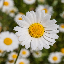

In [48]:
img = image.load_img('/content/gdrive/MyDrive/images/marguerite-daisy-types-1586981163.jpg',target_size=(64,64))
img


In [49]:
h = image.img_to_array(img)
h

array([[[157., 158., 160.],
        [188., 189., 191.],
        [199., 199., 197.],
        ...,
        [119., 124., 104.],
        [161., 162., 156.],
        [171., 172., 166.]],

       [[192., 191., 196.],
        [211., 211., 213.],
        [200., 198., 199.],
        ...,
        [130., 130., 106.],
        [172., 167., 161.],
        [179., 179., 171.]],

       [[207., 206., 211.],
        [219., 217., 220.],
        [199., 198., 194.],
        ...,
        [ 90.,  90.,  52.],
        [135., 133., 108.],
        [148., 146., 125.]],

       ...,

       [[ 93.,  95.,  32.],
        [ 62.,  64.,  14.],
        [ 52.,  53.,  11.],
        ...,
        [ 58.,  63.,  23.],
        [ 39.,  45.,   7.],
        [ 59.,  56.,  25.]],

       [[ 69.,  72.,  17.],
        [ 42.,  46.,   9.],
        [ 31.,  36.,   4.],
        ...,
        [ 45.,  47.,   7.],
        [ 40.,  42.,   5.],
        [ 45.,  45.,  11.]],

       [[ 48.,  51.,   8.],
        [ 28.,  32.,   5.],
        [ 20.,  

In [50]:
h= np.expand_dims(h,axis= 0)
h

array([[[[157., 158., 160.],
         [188., 189., 191.],
         [199., 199., 197.],
         ...,
         [119., 124., 104.],
         [161., 162., 156.],
         [171., 172., 166.]],

        [[192., 191., 196.],
         [211., 211., 213.],
         [200., 198., 199.],
         ...,
         [130., 130., 106.],
         [172., 167., 161.],
         [179., 179., 171.]],

        [[207., 206., 211.],
         [219., 217., 220.],
         [199., 198., 194.],
         ...,
         [ 90.,  90.,  52.],
         [135., 133., 108.],
         [148., 146., 125.]],

        ...,

        [[ 93.,  95.,  32.],
         [ 62.,  64.,  14.],
         [ 52.,  53.,  11.],
         ...,
         [ 58.,  63.,  23.],
         [ 39.,  45.,   7.],
         [ 59.,  56.,  25.]],

        [[ 69.,  72.,  17.],
         [ 42.,  46.,   9.],
         [ 31.,  36.,   4.],
         ...,
         [ 45.,  47.,   7.],
         [ 40.,  42.,   5.],
         [ 45.,  45.,  11.]],

        [[ 48.,  51.,   8.],
       

In [51]:
val = list(xtrain.class_indices.keys())
val

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [52]:
val[np.argmax(model.predict(h))]

'daisy'